<a href="https://www.kaggle.com/code/deveshchoudhury/notebook600118fb92?scriptVersionId=255004446" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
threshold=1000
non_null=df.count()
cols_to_drop=non_null[non_null<threshold].index.tolist()
df=df.drop(columns=cols_to_drop)
print(f"Stored {len(cols_to_drop)} columns to drop: {cols_to_drop}")

Stored 6 columns to drop: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [5]:
df=df.dropna()
df.reset_index(drop=True,inplace=True)

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1090,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1091,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1092,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
categorical_cols=df.select_dtypes(include=['object']).columns

In [8]:
df=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Columns: 220 entries, Id to SaleCondition_Partial
dtypes: bool(182), float64(3), int64(35)
memory usage: 519.4 KB


In [10]:
bool_cols=df.select_dtypes(include='bool').columns
df[bool_cols]=df[bool_cols].astype(int)

In [11]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1090,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1091,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1092,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


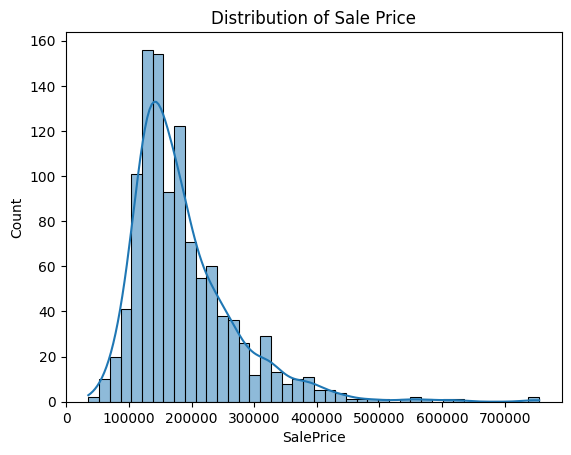

In [12]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['SalePrice'],kde=True)
plt.title('Distribution of Sale Price')
plt.show()

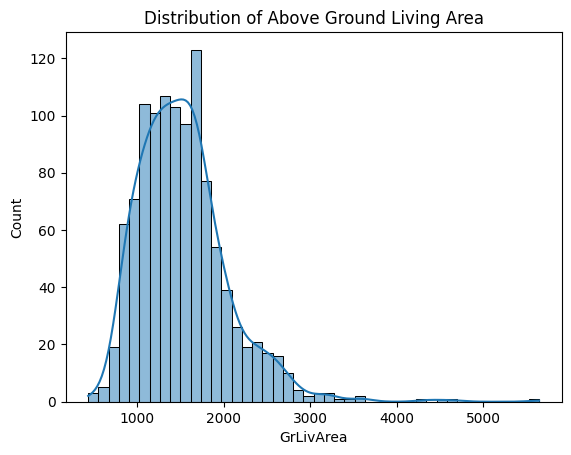

In [13]:
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Distribution of Above Ground Living Area')
plt.show()

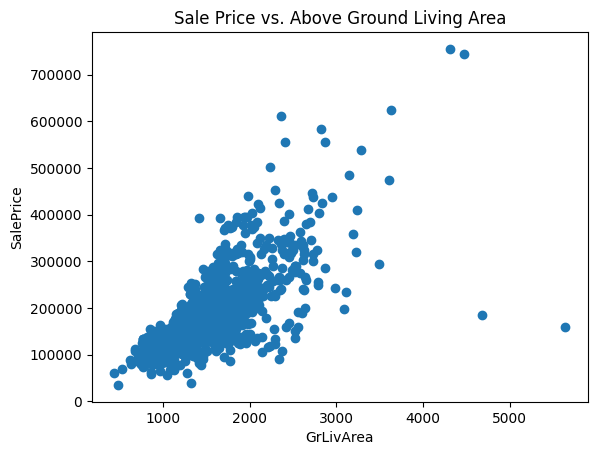

In [14]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

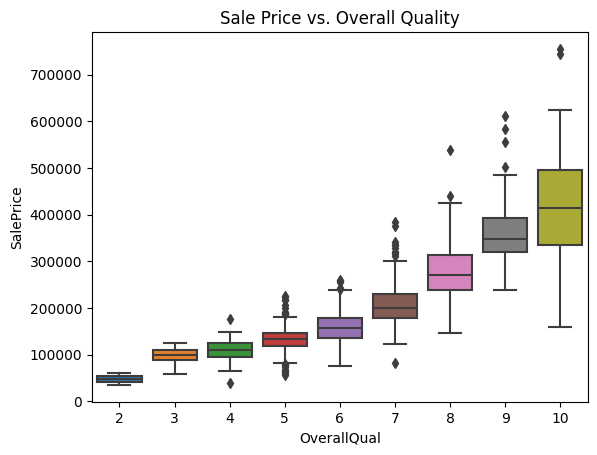

In [15]:
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('Sale Price vs. Overall Quality')
plt.show()

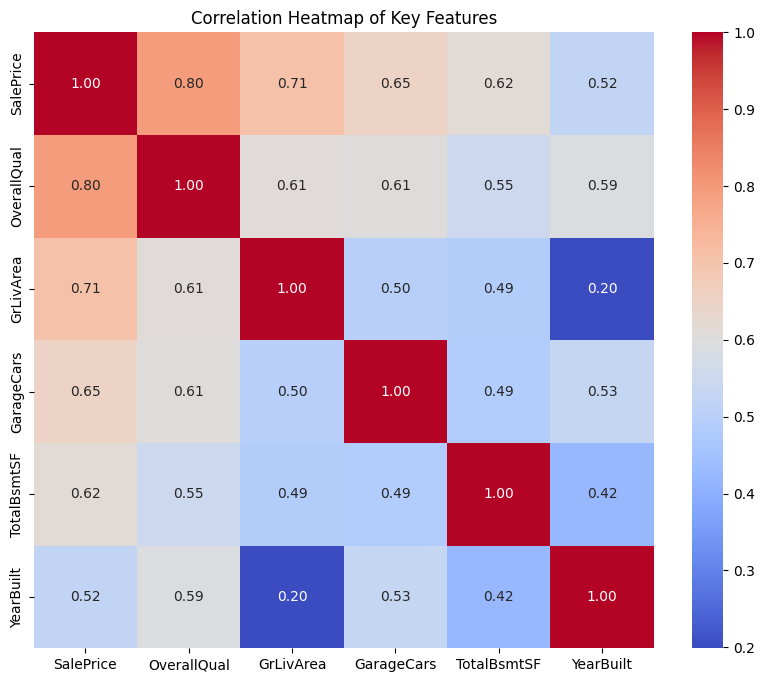

In [16]:
corrmat = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Features')
plt.show()

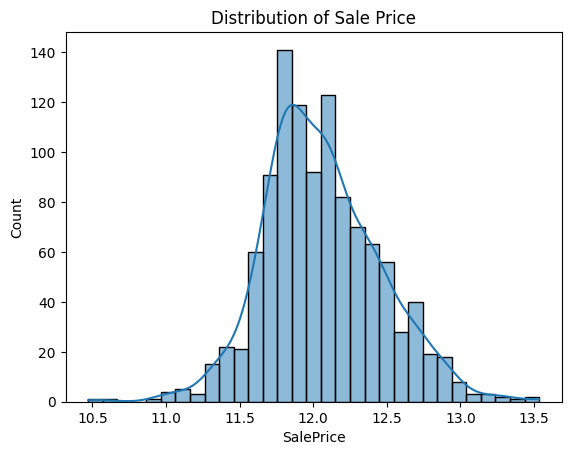

In [17]:
df['SalePrice'] = np.log1p(df['SalePrice'])
df['GrLivArea']=np.log1p(df['SalePrice'])
sns.histplot(df['SalePrice'],kde=True)
plt.title('Distribution of Sale Price')
plt.show()

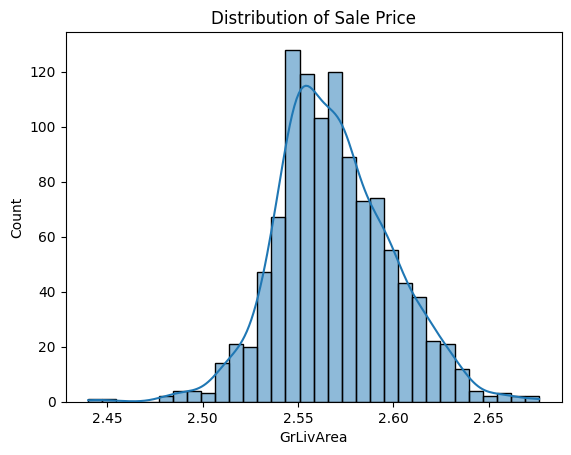

In [18]:
sns.histplot(df['GrLivArea'],kde=True)
plt.title('Distribution of Sale Price')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
X=df.drop(columns=['SalePrice','Id'],axis=1)
y=df['SalePrice']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

In [21]:
from sklearn.linear_model import LassoCV
lasso_cv_model=LassoCV(cv=5,random_state=42,max_iter=10000)
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, max_iter=10000, random_state=42)

In [22]:
print(f"The best alpha found was: {lasso_cv_model.alpha_}")

The best alpha found was: 0.00038556567696337776


In [23]:
predictions_log = lasso_cv_model.predict(X_test)
final_predictions=np.expm1(predictions_log)
y_test_orig=np.expm1(y_test)

In [24]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test_orig,final_predictions))
print(f"Root Mean Squared Error: ${rmse:,.10f}")

Root Mean Squared Error: $3,026.1062150415
